In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

file_path = 'Downloads/D600 Task 2 Dataset 1 Housing Information.csv'

df = pd.read_csv(file_path)

print(df)

        ID        Price  SquareFootage  NumBathrooms  NumBedrooms  \
0     4922  255614.8992         566.62      1.000000            4   
1     5009  155586.0947        1472.34      1.000000            2   
2     4450  131050.8324         550.00      1.779354            3   
3     1070  151361.7125         941.81      2.035254            2   
4      400  113167.6128         550.00      1.064644            3   
...    ...          ...            ...           ...          ...   
6995  6987  307821.1758         550.00      2.111022            4   
6996  6995  421368.8869        1726.12      4.056115            2   
6997  6996  473382.5348        1026.36      2.077177            5   
6998  6998  343397.9756        2218.22      1.000000            4   
6999  7000  438060.8193        1553.57      3.988377            4   

      BackyardSpace  CrimeRate  SchoolRating  AgeOfHome  DistanceToCityCenter  \
0            779.42      20.56          5.62      39.46                 10.08   
1        

In [2]:
#C2

# Descriptive stats for the dependent variable

descriptive = df['IsLuxury'].value_counts()
proportions = df['IsLuxury'].value_counts(normalize = True)

print("Frequency of each category:")
print(descriptive)

print("\nProportion of each category:")
print(proportions)

Frequency of each category:
IsLuxury
1    3528
0    3472
Name: count, dtype: int64

Proportion of each category:
IsLuxury
1    0.504
0    0.496
Name: proportion, dtype: float64


In [3]:
# C2

# Descriptive stats for independent variables

variables = ['SquareFootage', 'NumBedrooms']
stats = df[variables].describe()

#Results
print(stats)

       SquareFootage  NumBedrooms
count    7000.000000  7000.000000
mean     1048.947459     3.008571
std       426.010482     1.021940
min       550.000000     1.000000
25%       660.815000     2.000000
50%       996.320000     3.000000
75%      1342.292500     4.000000
max      2874.700000     7.000000


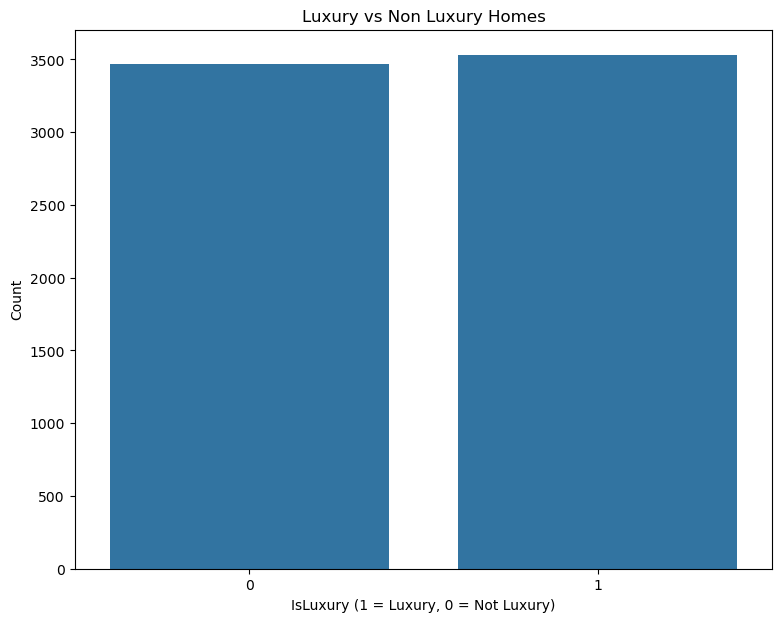

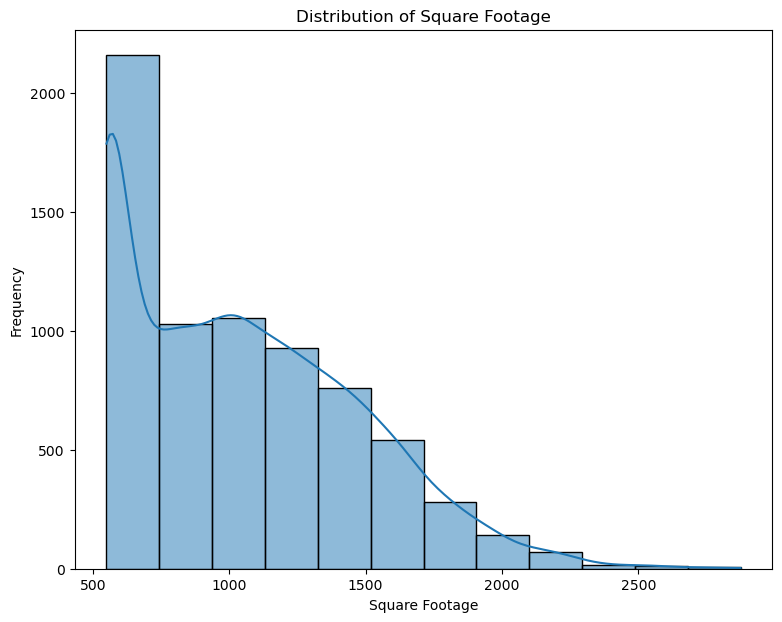

Text(0, 0.5, 'Count')

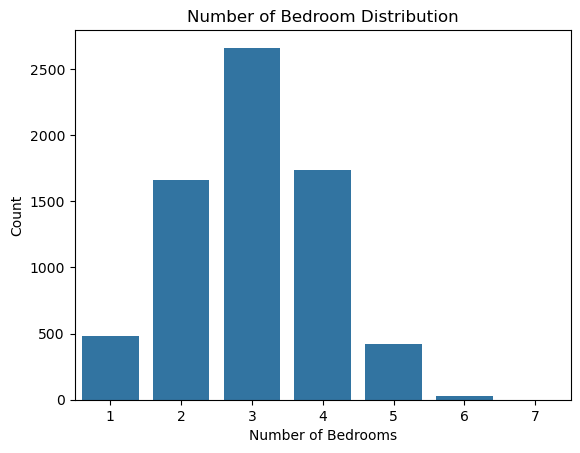

In [4]:
#C3

# Univariate visualizations

# Histogram of Price distribution
plt.figure(figsize = (9,7))

sns.countplot(x = 'IsLuxury', data = df)
plt.title('Luxury vs Non Luxury Homes')
plt.xlabel('IsLuxury (1 = Luxury, 0 = Not Luxury)')
plt.ylabel('Count')

# Histogram of Square Footage Distribution
plt.figure(figsize = (9, 7))
sns.histplot(df['SquareFootage'], kde = True, bins = 12)
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.show()

sns.countplot(x = 'NumBedrooms', data = df)
plt.title('Number of Bedroom Distribution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

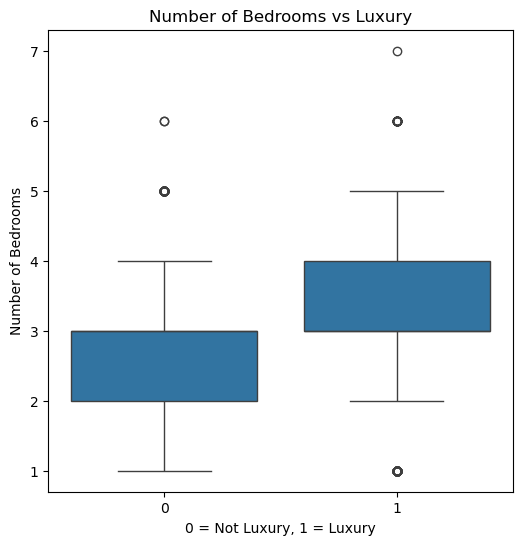

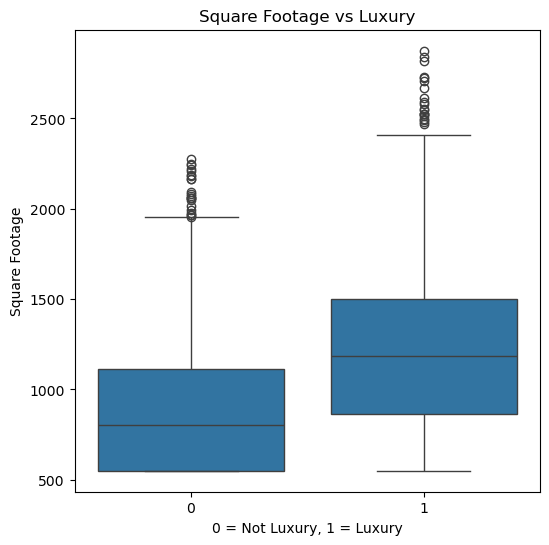

In [5]:
# C3

# Bivariate visualization

# Box plot for NumBedrooms vs IsLuxury
plt.figure(figsize = (6,6))
sns.boxplot(x = 'IsLuxury', y = 'NumBedrooms', data = df)
plt.title('Number of Bedrooms vs Luxury')
plt.xlabel('0 = Not Luxury, 1 = Luxury')
plt.ylabel('Number of Bedrooms')
plt.show()

# Box plot for SquareFootage vs IsLuxury

plt.figure(figsize = (6,6))
sns.boxplot(x = 'IsLuxury', y = 'SquareFootage', data = df)
plt.title('Square Footage vs Luxury')
plt.xlabel('0 = Not Luxury, 1 = Luxury')
plt.ylabel('Square Footage')
plt.show()

In [6]:
# D1

# Defining the independent variables (SquareFootage, NumBedrooms)
x = df[['SquareFootage', 'NumBedrooms']]

# Defining the dependent variable (Luxury)
y = df[['IsLuxury']]

# Split the data 80/20 for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [7]:
# Test_df and Train_df as a csv file
train_df = pd.concat([x_train, y_train], axis=1)
test_df = pd.concat([x_test, y_test], axis=1)

train_df.to_csv('training_data600_2.csv', index=False)
test_df.to_csv('testing_data600_2.csv', index=False)

In [8]:
# Add Constant/intercept to the model
x_constant = sm.add_constant(x)

# Fit to Logistic regression
logit_model = sm.Logit(y, x_constant).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.571323
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               IsLuxury   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6997
Method:                           MLE   Df Model:                            2
Date:                Wed, 09 Jul 2025   Pseudo R-squ.:                  0.1757
Time:                        19:29:15   Log-Likelihood:                -3999.3
converged:                       True   LL-Null:                       -4851.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.2498      0.125    -33.947      0.000      -4.495      -4.004
SquareFootage     0.

In [9]:
# Predicting the training set
y_train_pred = logit_model.predict(x_constant)

# Converting probabilities to binary - use values to get numpy array
y_train_pred_binary = [1 if prob > 0.5 else 0 for prob in y_train_pred]

# Add constant to x_test
x_constant = sm.add_constant(x_test)

# Predicting probabilities on test
y_test_pred = logit_model.predict(x_constant)

# Converting probabilities to binary - flatten the array first to make it 1D
y_test_pred = y_test_pred  
y_test_pred_binary = np.where(y_test_pred > 0.5, 1, 0)

# Comparing the actual vs predicted values in a data frame
# Use .values.flatten() if y_test is a DataFrame, or .to_numpy().flatten() as alternatives
compare = pd.DataFrame({'Actual': y_test.values.flatten() if hasattr(y_test, 'values') else y_test.flatten(), 
                        'Predict': y_test_pred_binary.flatten()})
print(compare.head())

   Actual  Predict
0       0        0
1       1        1
2       0        0
3       1        1
4       1        1


In [37]:


# Convert lists to numpy arrays if they aren't already
if isinstance(y_train, list):
    y_train = np.array(y_train)
if isinstance(y_train_pred_binary, list):
    y_train_pred_binary = np.array(y_train_pred_binary)
if isinstance(y_test, list):
    y_test = np.array(y_test)
if isinstance(y_test_pred_binary, list):
    y_test_pred_binary = np.array(y_test_pred_binary)
# Make sure you're using the same subset of data for both actual and predicted values
# Once shapes match, calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred_binary[:len(y_train)])  # Ensure same length
test_accuracy = accuracy_score(y_test, y_test_pred_binary[:len(y_test)])      # Ensure same length

print(f'Training Accuracy Score: {train_accuracy}')
print(f'Test Accuracy Score: {test_accuracy}')

# Confusion Matrices with matched lengths
train_conf_matrix = confusion_matrix(y_train, y_train_pred_binary[:len(y_train)])
test_conf_matrix = confusion_matrix(y_test, y_test_pred_binary[:len(y_test)])

print('Training Confusion Matrix:')
print(train_conf_matrix)
print('Test Confusion Matrix:')
print(test_conf_matrix)

Training Accuracy Score: 0.7141071428571428
Test Accuracy Score: 0.7142857142857143
Training Confusion Matrix:
[[2035  755]
 [ 846 1964]]
Test Confusion Matrix:
[[521 161]
 [239 479]]


In [13]:
# D2

#----------------Optimization-------------

In [36]:
x = x_train  
y = y_train

# Add constant to the features
x_with_const = sm.add_constant(x)

# Backward Elimination code
def backward_elimination(x, y, threshold_in=0.05):
    x = x.copy()
    y = y.copy()
    
    x, y = x.align(y, join='inner', axis=0)
    
    features = x.columns.tolist()
    while True:
        try:
            model = sm.Logit(y, x[features]).fit(disp=0)
            p_values = model.pvalues
            max_p_value = p_values.max()
            
            if max_p_value > threshold_in:
                excluded_feature = p_values.idxmax()  # Fixed variable name
                features.remove(excluded_feature)
                print(f'Removed: {excluded_feature} with p-value: {max_p_value}')
            else:
                break
        except:
            print("Model fitting failed. Check for multicollinearity or separation issues.")
            break
            
    return features, model

# Perform backward elimination
final_features, optimized = backward_elimination(x_with_const, y)

# Display results
print(optimized.summary())

                           Logit Regression Results                           
Dep. Variable:               IsLuxury   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5597
Method:                           MLE   Df Model:                            2
Date:                Wed, 09 Jul 2025   Pseudo R-squ.:                  0.1765
Time:                        19:46:01   Log-Likelihood:                -3196.4
converged:                       True   LL-Null:                       -3881.6
Covariance Type:            nonrobust   LLR p-value:                2.765e-298
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
SquareFootage     0.0021   8.07e-05     25.526      0.000       0.002       0.002
NumBedrooms       0.7134      0.033     21.747      0.000       0.649       0.778
const            -4.2880      0.141    -

In [25]:
# Running the prediction of the test data on the optimized model
y_test_pred_prob = optimized.predict(x_test[final_features])
y_test_pred_binary = [1 if prob > 0.5 else 0 for prob in y_test_pred_prob]

# Flat the array to be 1 dimensional

y_test = np.array(y_test).ravel()
y_test_pred_prob = np.array(y_test_pred_prob).ravel()
y_test_pred_binary = np.array(y_test_pred_binary).ravel()

# New data frame for the results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Probability': y_test_pred_prob,
    'Predicted': y_test_pred_binary})

# Display results of predicted of optimized model
print('Test Results:')
print(results_df)

Test Results:
      Actual  Predicted_Probability  Predicted
0          0               0.150850          0
1          1               0.595354          1
2          0               0.175544          0
3          1               0.510312          1
4          1               0.887488          1
...      ...                    ...        ...
1395       0               0.664801          1
1396       0               0.331487          0
1397       1               0.344543          0
1398       0               0.322882          0
1399       1               0.465546          0

[1400 rows x 3 columns]


In [38]:
# Predict on the training set using the optimized model
if 'const' in final_features:
    x_train['const'] = 1.0
    y_train_pred_prob = optimized.predict(x_train[final_features])
else:
    y_train_pred_prob = optimized.predict(x_train[final_features])

y_train_pred_binary = [1 if prob > 0.5 else 0 for prob in y_train_pred_prob]
train_conf_matrix = confusion_matrix(y_train, y_train_pred_binary)
print('Training Confusion Matrix (Optimized Model):')
print(train_conf_matrix)

Training Confusion Matrix (Optimized Model):
[[2035  755]
 [ 846 1964]]


In [39]:
# Predict on the test set using the optimized model
y_test_pred_prob = optimized.predict(x_test[final_features])
y_test_pred_binary = [1 if prob > 0.5 else 0 for prob in y_test_pred_prob]
test_conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print('Test Confusion Matrix (Optimized Model):')
print(test_conf_matrix)

Test Confusion Matrix (Optimized Model):
[[521 161]
 [239 479]]


In [40]:
y_train_pred_prob = optimized.predict(x_train[final_features])

# Convert probabilities to binary predictions (1 if prob > 0.5 else 0)
y_train_pred_binary = [1 if prob > 0.5 else 0 for prob in y_train_pred_prob]

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_binary)

print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.7141


In [41]:
y_test_pred_prob = optimized.predict(x_test[final_features])

# Convert probabilities to binary predictions (1 if prob > 0.5 else 0)
y_test_pred_binary = [1 if prob > 0.5 else 0 for prob in y_test_pred_prob]

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_binary)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7143


In [31]:
#----------Checking the Assumption verifications----------

In [32]:
# 1. Testing the collinearity between square footage and number of bedrooms
x = df[['SquareFootage', 'NumBedrooms']]
x_constant = sm.add_constant(x)

# Calculating the Variance Inflation Factor(VIF)
vif = pd.DataFrame()
vif['Variable'] = x_constant.columns
vif['VIF'] = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]

# Display results
print(vif)

        Variable        VIF
0          const  14.564638
1  SquareFootage   1.007749
2    NumBedrooms   1.007749


In [33]:
# 2. Checking the unique values of IsLuxury

print(df['IsLuxury'].unique())

[0 1]


In [34]:
# 3. Checking for independence by looking for any duplicate rows

duplicates = df.duplicated().sum()

print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0
